#### [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv` is used to train a model to predict whether or not a mushroom is poisonous.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.model_selection import train_test_split

def gen_mushroom_data():
    # 8123*23
    mush_df_cat = pd.read_csv('mushrooms.csv')    
    # 8124*119
    mush_df = pd.get_dummies(mush_df_cat) # Convert categorical variable into dummy
    #print(mush_df_cat.iloc[:5,:10])
    #print(mush_df.iloc[:5,:10])
    
    # (8124*117) all rows, third column onwards, 1st and 2nd col - class_e, class_p
    X_mush = mush_df.iloc[:,2:]
    y_mush = mush_df.iloc[:,1]     # (8124) all rows, second column only
    #print(X_mush.iloc[:5,:10])
    
    return (train_test_split(X_mush, y_mush, random_state=0))
    #return (X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy())

# DataFrame X_train : (6093, 117)    X_test : (2031, 117)
# Series y_train, y_test
(X_train, X_test, y_train, y_test) = gen_mushroom_data()

#### Fit  LogisticRegression classifier model with C=0.05
Accuracy is 0.997

In [2]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.05).fit(X_train, y_train)

# y_pred of type ndarray
y_pred = clf.predict(X_test)
print(y_pred[:10])

clf.score(X_test, y_test)

[1 0 0 0 0 0 1 1 0 1]


0.9970457902511078

#### Fit  Naive Bayes classifier model with smoothing alpha=0.1
With BernoulliNB, accuracy is 0.968

With MultinomialNB, accuracy is 0.983

In [3]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb_clf = MultinomialNB(alpha = 0.1).fit(X_train, y_train)
nb_clf.score(X_test, y_test)

0.983751846381093

#### Fit  DecisionTree classifier model with max_depth=4
Accuracy is 0.991

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 4, random_state=0).fit(X_train, y_train)
print(tree_clf)

tree_clf.score(X_test, y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


0.9911373707533235

#### Getting the top 5 features from decision tree model

In [5]:
# clf.feature_importances_ is an array of length 117

feature_names = X_train.columns.values

featureList= list(zip(tree_clf.feature_importances_, feature_names))

featureList.sort(reverse=True) # Sorts on the first entry in the tuple
print("Printing top 10 features",featureList[:10])

[el[1] for el in featureList[:5]]

Printing top 10 features [(0.6392934675800113, 'odor_n'), (0.1730049597724037, 'stalk-root_c'), (0.08854908000205988, 'stalk-root_r'), (0.03515313346821719, 'spore-print-color_r'), (0.02403568227731495, 'odor_l'), (0.017480953689047903, 'stalk-color-above-ring_c'), (0.014046263492472446, 'stalk-surface-below-ring_y'), (0.005760702369927127, 'gill-size_n'), (0.002675757348545448, 'cap-surface_g'), (0.0, 'veil-type_p')]


['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

#### Fit  RandomForest classifier model with max_depth=4
Accuracy is 0.99

In [6]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth = 4, random_state=0).fit(X_train, y_train)
print(forest_clf)

forest_clf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


0.9906450024618415

#### Fit SVM classifier, default kernel 'rbf'
With this classifier, explore the effect of gamma parameter (controls kernel width) on classifier accuracy by using validation_curve function.

For each level of gamma, validation_curve will fit 3 models on 3 different subsets of the data, returning 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores.

In [7]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import validation_curve

# 0.0001 to 10
param_vals = np.logspace(-4,1,6)

svm_clf = SVC(random_state=0).fit(X_train, y_train)
print(svm_clf)
svm_clf.score(X_test, y_test)

# validation_curve for 6 gamma and 3 folds
# both scores of type ndarray and dim 6*3
train_scores, test_scores = validation_curve(svm_clf, X_test, y_test, 'gamma', param_range = param_vals, cv=3)

# for each gamma, find the average core
mean_train = np.mean(train_scores, axis=1)
mean_test = np.mean(test_scores, axis=1)
print(mean_train, mean_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
[0.56646972 0.93106844 0.990645   1.         1.         1.        ] [0.56720827 0.9300837  0.98966027 1.         0.99458395 0.52240276]


#### Plot the validation scores at each gamma

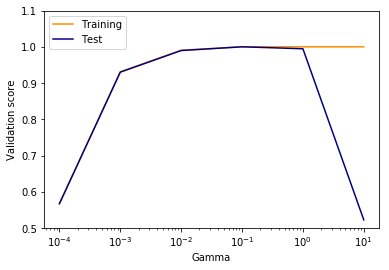

In [8]:
plt.figure()

plt.semilogx(param_vals, mean_train, label='Training', color='darkorange')
plt.semilogx(param_vals, mean_test, label='Test', color='navy')
plt.xlabel('Gamma')
plt.ylabel('Validation score');
plt.ylim(0.5,1.1)
plt.legend(loc='best')

#### Based on the scores from validation_curve, what gamma value corresponds to a model that is :
* Good fitting (Max. test accuracy)
* Overfitting (max diff point, if train_score > test_score)
* Underfitting (Min degree before deg_good where both train_score and test_score is +ve)

In [20]:
# 0.0001 to 10
param_vals = np.logspace(-4,1,6)

# gamma_good at which maximum test score occurs
max_index = np.argmax(mean_test)    
gamma_good = param_vals[max_index]
print("Good gamma", max_index, gamma_good)

# deg_over : min gamma after gamma_good where diff(train_score, test_score) > 0.2
# Here, it is also the max diff point
for i in range(max_index+1, 6):
    diff_score = mean_train[i]-mean_test[i]
    #print(i, diff_score)
    if diff_score > 0.2 :            
        gamma_over = param_vals[i]
        print("Overfit gamma", i, gamma_over)
        break
    
# deg_under : min gamma before gamma_good where both train_score and test_Score is +ve 
for i in range(0, max_index):
    if(mean_test[i] > 0 and mean_train[i] > 0):            
        gamma_under = param_vals[i]
        print("Underfit gamma", i, gamma_under)
        break

Good gamma 3 0.1
Overfit gamma 5 10.0
Underfit gamma 0 0.0001
